# IMPORT DATASETS AND LIBRARIES

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Visualization
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
from sklearn.metrics import confusion_matrix

# NLP
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Transformer
from transformers import pipeline

In [2]:
# load the stock news data
stocks_df = pd.read_csv("/Users/andrewdarmond/Documents/FinanceML/stock_sentiment.csv")

In [3]:
# Let's view the dataset 
stocks_df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [4]:
# dataframe information
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [5]:
# check for null values
stocks_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [6]:
# check for unique values
stocks_df['Sentiment'].nunique()

2

"0" = Negative & "1" = Positive


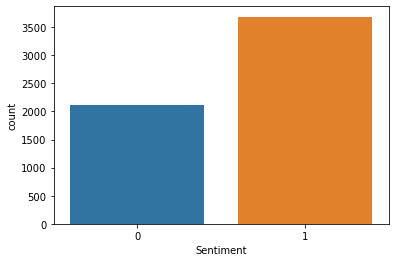

In [7]:
ax = sns.countplot(x="Sentiment", data=stocks_df);
print('''"0" = Negative & "1" = Positive''')

# PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
# Let's define a function to remove punctuations
def remove_punc(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  return Test_punc_removed_join

In [10]:
# Let's remove punctuations from our dataset 
stocks_df['Text Without Punctuation'] = stocks_df['Text'].apply(remove_punc)

In [11]:
stocks_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [12]:
stocks_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [13]:
stocks_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

# PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [14]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https','httpstco'])

In [15]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if len(token) >= 2 and token not in stop_words:
      result.append(token)
  
  return result

In [16]:
# apply pre-processing to the text column
stocks_df['Text Without Punc & Stopwords'] = stocks_df['Text Without Punctuation'].apply(preprocess)

In [17]:
stocks_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [18]:
stocks_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

# PLOT WORDCLOUD

In [19]:
stocks_df['Text Without Punc & Stopwords Joined'] = stocks_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

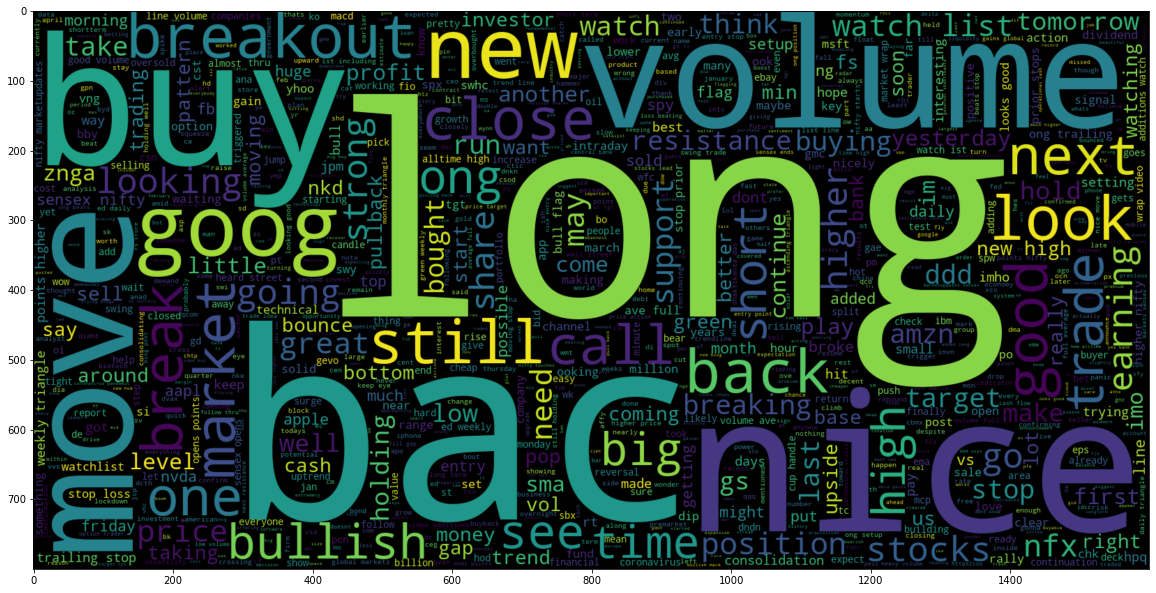

In [20]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words= 1000, width = 1600, height= 800).generate(" ".join(stocks_df[stocks_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation= 'bilinear');

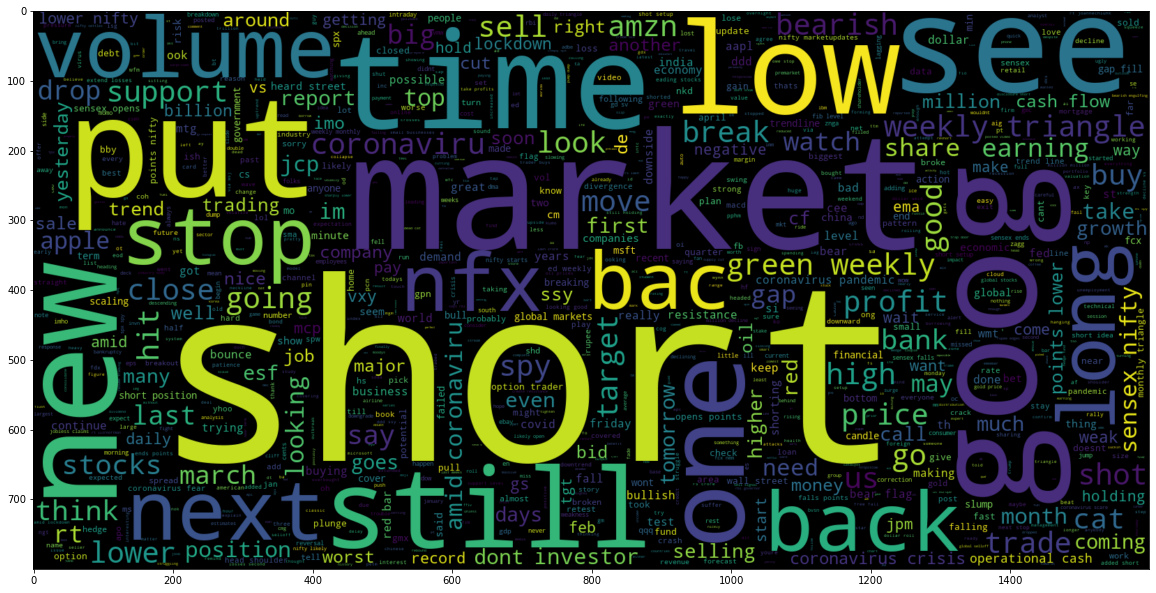

In [21]:
# Negative
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words= 1000, width= 1600, height= 800).generate(" ".join(stocks_df[stocks_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation='bilinear')

# VISUALIZE CLEANED DATASETS

In [22]:
# word_tokenize is used to break up a string into words
print(stocks_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stocks_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'aj', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [23]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in stocks_df['Text Without Punc & Stopwords Joined']:
  tokens = nltk.word_tokenize(doc)
  if (maxlen < len(tokens)):
    maxlen = len(tokens)
print("The maximum number of words in any doucment is:", maxlen)

The maximum number of words in any doucment is: 22


In [24]:
tweets_length = [len(nltk.word_tokenize(x)) for x in stocks_df['Text Without Punc & Stopwords Joined']]

In [25]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins= 50)
#fig.show()

# PREPARE THE DATA BY TOKENIZING AND PADDING

In [26]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stocks_df['Text Without Punc & Stopwords']:
  for j in i:
    list_of_words.append(j)

In [27]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9646

In [28]:
# split the data into test and train 
X = stocks_df['Text Without Punc & Stopwords']
y = stocks_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

print(f'Training Shape:',X_train.shape)
print(f'Testing Shape:',X_test.shape)

Training Shape: (5211,)
Testing Shape: (580,)


In [29]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words= total_words)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [30]:
print('The encoding for document \n', X_train[1:2], '\n', train_sequences[1])

The encoding for document 
 1884    [story, moving, tandem]
Name: Text Without Punc & Stopwords, dtype: object 
 [484, 134, 3847]


In [31]:
# Add padding to training and testing
padding_train = pad_sequences(train_sequences, maxlen= 15, padding= 'post', truncating='post')
padding_test = pad_sequences(test_sequences, maxlen= 15, truncating= 'post')

In [32]:
for i, doc in enumerate(padding_train[:3]):
  print("The padded encoding for documents:", i+1," is:", doc)

The padded encoding for documents: 1  is: [  20 3841 1400 3842 3843   21 3844 3845 3846    0    0    0    0    0
    0]
The padded encoding for documents: 2  is: [ 484  134 3847    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for documents: 3  is: [ 290  116 2017 1196  545  303  202   99 2018  640  340 1646  920    0
    0]


In [33]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

# Printing to see accurate distribution
print(f'Training Shape:', y_train_cat.shape)
print(f'Testing Shape:', y_test_cat.shape)

Training Shape: (5211, 2)
Testing Shape: (580, 2)


# DEEP LEARNING NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

In [34]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4938752   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,759,362
Trainable params: 5,759,362
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(padding_train, y_train_cat, batch_size= 32, validation_split= 0.2, epochs= 2)

Epoch 1/2
131/131 [==============================] - 20s 139ms/step - loss: 0.6334 - acc: 0.6636 - val_loss: 0.4766 - val_acc: 0.7526
Epoch 2/2
131/131 [==============================] - 20s 152ms/step - loss: 0.2858 - acc: 0.8921 - val_loss: 0.5192 - val_acc: 0.7824


# ASSESS TRAINED MODEL PERFORMANCE

In [36]:
# make prediction
pred = model.predict(padding_test)

In [37]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [38]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [39]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7793103448275862

"0" = Negative & "1" = Positive


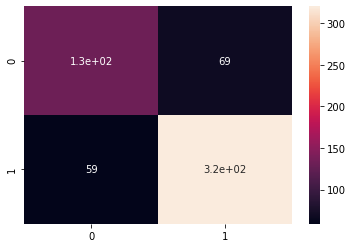

In [40]:
# Plot the confusion matrix
print('''"0" = Negative & "1" = Positive''')
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True);